## Dataset cachexia - Exploração de dados, pré-processamento e análise estatística univariada
Nesta secção vamos trabalhar com os dados do dataset Cachexia : 

*"Concentrations of 63 metabolites in 77 urine samples from cancer patients, measured by 1H NMR (Eisner et al, 2011). Metadata defines the two groups: control and cachexic patients."*

Importação e análise da dimensão dos dados

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
# para desenhar os gráficos dentro do notebook
%matplotlib inline


In [3]:
data = pd.read_csv('data_cachexia.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta_cachexia.csv',sep=',', index_col = 0)
print (data.shape)
print (meta.shape)
data.head()

(77, 63)
(77, 1)


,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
Patient ID,,,,,,,,,,,,,,,,,,,,,
PIF_178,40.85,65.37,18.73,26.05,71.52,1480.30,56.83,10.07,566.80,120.30,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
PIF_087,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,368.71,432.68,...,83.10,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
PIF_090,270.43,64.72,12.18,65.37,23.81,14.30,5.64,23.34,665.14,292.95,...,82.27,60.34,31.50,59.15,2164.62,330.30,86.49,58.56,145.47,83.93
NETL_005_V1,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,411.58,214.86,...,235.10,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
PIF_115,22.20,73.70,15.64,83.93,33.12,29.67,76.71,69.41,165.67,97.51,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84


Sumário dos dados

In [4]:
data.describe()

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,105.630390,71.573636,18.159740,37.250649,145.087143,76.756364,21.717013,21.647792,218.879221,112.021039,...,66.243117,81.757273,35.557662,35.667013,100.933377,204.219740,135.397532,40.630390,370.288312,89.686883
std,130.025595,133.192811,27.614526,23.956807,342.522174,191.014237,26.198904,24.946091,196.868730,120.812569,...,56.333318,83.248486,35.002894,29.697365,250.216325,278.141989,170.266474,39.566754,530.689300,77.239064
min,4.710000,6.420000,1.280000,4.850000,5.530000,2.610000,1.700000,0.920000,27.660000,15.490000,...,8.670000,4.220000,3.100000,4.100000,10.070000,12.940000,11.590000,4.900000,11.360000,8.000000
25%,28.790000,15.800000,5.260000,15.800000,22.420000,11.700000,5.990000,5.260000,82.270000,41.680000,...,21.330000,23.570000,11.940000,12.180000,29.960000,36.230000,30.270000,12.430000,67.360000,27.390000
50%,45.600000,36.600000,10.490000,32.460000,55.150000,22.650000,11.700000,12.550000,144.030000,70.110000,...,46.990000,60.340000,27.390000,33.120000,50.400000,129.020000,78.260000,26.840000,162.390000,68.720000
75%,141.170000,73.700000,19.490000,54.600000,92.760000,56.260000,29.960000,30.270000,333.620000,145.470000,...,96.540000,113.300000,44.260000,50.400000,89.120000,254.680000,167.340000,57.400000,387.610000,130.320000
max,685.400000,1032.770000,172.430000,93.690000,2465.130000,1480.300000,175.910000,164.020000,1043.150000,796.320000,...,259.820000,539.150000,179.470000,160.770000,2164.620000,1863.110000,854.060000,217.020000,2697.280000,317.350000


Sumário dos metadados 

In [5]:
meta.describe()

,Muscle.loss
count,77
unique,2
top,cachexic
freq,47


**Ex. 1) Calcule a frequência de cada categoria nos metadados**

In [6]:
meta.groupby("Muscle.loss").size()    

Muscle.loss
cachexic    47
control     30
dtype: int64

**Ex.2) Verifique que não há valores em falta nos dados.**

In [7]:
data.isnull().sum().sum()
#primeiro sum é para cada coluna e o segundo para somar todas

#ou
#data.isnull().values.any()

0

Para cada coluna apresentar o intervalo de valores

In [8]:
data.apply(lambda x: str(x.min())+"---"+str( x.max()))

1.6-Anhydro-beta-D-glucose       4.71---685.4
1-Methylnicotinamide           6.42---1032.77
2-Aminobutyrate                 1.28---172.43
2-Hydroxyisobutyrate             4.85---93.69
2-Oxoglutarate                 5.53---2465.13
                                   ...       
cis-Aconitate                 12.94---1863.11
myo-Inositol                   11.59---854.06
trans-Aconitate                  4.9---217.02
pi-Methylhistidine            11.36---2697.28
tau-Methylhistidine              8.0---317.35
Length: 63, dtype: object

Criar um gráfico que permita visualizar os valores dos metabolitos "Alanine", "Citrate" e "Creatinine" para os pacientes de control. 

<AxesSubplot:xlabel='Patient ID'>

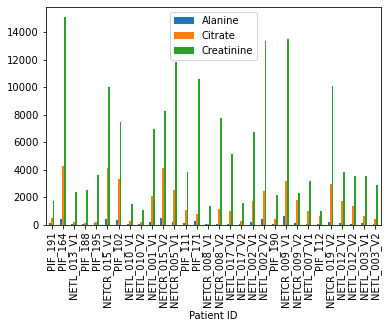

In [9]:
data_control = data[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex.3) Exemplo de discretização de dados - altere os dados do metabolito Citrate de valor continuo para discretos: 
    "elevado", "baixo" consoante o valor seja: maior ou menor que a média.**

In [10]:
cit = data.Citrate.copy() #copiar os dados

mean = cit.mean() #criar uma nova variável
cit[cit > mean] = "elevado" #o que está acima da média (nova variável) é "elevado"
cit[cit != "elevado"] = "baixo" #o que não é elevado, está "baixo"
cit

Patient ID
PIF_178         elevado
PIF_087         elevado
PIF_090           baixo
NETL_005_V1     elevado
PIF_115           baixo
                 ...   
NETCR_019_V2    elevado
NETL_012_V1       baixo
NETL_012_V2       baixo
NETL_003_V1       baixo
NETL_003_V2       baixo
Name: Citrate, Length: 77, dtype: object

Standardização dos dados (usando scikit-learn)

<AxesSubplot:xlabel='Patient ID'>

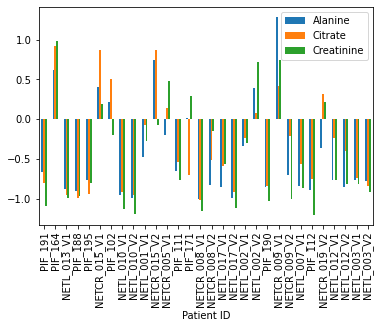

In [11]:
#A standarização faz com que as variáveis que no gráfico anterior estavam em valores muito diferentes, fiquem
## agora a variar nos mesmos valores, entre 1 e -1 apenas

from sklearn import preprocessing
array_data = preprocessing.scale(data)#, with_mean = False)
data_scale =  pd.DataFrame(array_data, index =data.index , columns = data.columns)
data_control = data_scale[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex. 4) Cria um boxplot para ver a distribuição dos valores dos metabolitos Asparagine, Acetate, Succinate.**

<function matplotlib.pyplot.show(close=None, block=None)>

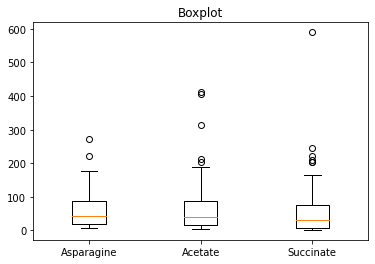

In [12]:
# dá para selecionar os dados com o iloc ou com o loc

#indexes = (ind for ind in range(len(data.colums)) if data.columns[ind] in ['Asparagine', 'Acetate', 'Succinate']
#sel_data = data.iloc[:,'Asparagine', 'Acetate', 'Succinate']
#faltam aqui coisas
           
#ou
sel_data = data.loc[:, ['Asparagine', 'Acetate', 'Succinate']].values #os : é para selecionar todas as linhas
labels = ['Asparagine', 'Acetate', 'Succinate']

plt.boxplot(sel_data)
plt.xticks([1,2,3], labels)
plt.title("Boxplot")
plt.show

Transformação logarítmica

In [13]:
log_data = np.log2(data)
log_data.apply(lambda x: str(x.min())+"---"+str( x.max()))

1.6-Anhydro-beta-D-glucose     2.2357270598380583---9.420802381631812
1-Methylnicotinamide           2.682573297347578---10.012303283487379
2-Aminobutyrate               0.35614381022527536---7.429866991382293
2-Hydroxyisobutyrate           2.277984747299765---6.5498231649670045
2-Oxoglutarate                 2.4672794804599825---11.26744801459588
                                               ...                   
cis-Aconitate                  3.693765712217783---10.863497139709002
myo-Inositol                    3.534808661231747---9.738193616367314
trans-Aconitate                 2.292781749227846---7.761684193602206
pi-Methylhistidine            3.5058909297299574---11.397289577701605
tau-Methylhistidine                           3.0---8.309931032395417
Length: 63, dtype: object

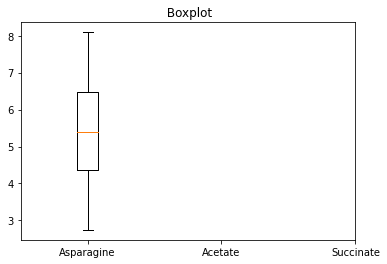

In [14]:
sel_log_data = log_data.iloc[:,14].values # 14 são os indexes

plt.boxplot(sel_log_data)
plt.xticks([1,2,3],labels)
plt.title(" Boxplot")
plt.show()

### Exemplos com testes estatísticos


**Ex. 5) Verifica se a distribuição do metabolito Alanine segue a distribuição normal quer de forma visual (QQplot), quer usando o teste de Shapiro.**

In [15]:
import statsmodels.api as sm
from scipy import stats

(array([31., 15., 13.,  9.,  5.,  0.,  1.,  1.,  1.,  1.]),
 array([  16.78 ,  146.393,  276.006,  405.619,  535.232,  664.845,
         794.458,  924.071, 1053.684, 1183.297, 1312.91 ]),
 <BarContainer object of 10 artists>)

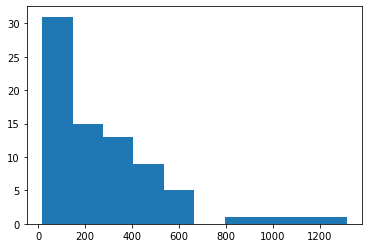

In [16]:
plt.close()
data_alanine = data.Alanine
plt.hist(data_alanine)

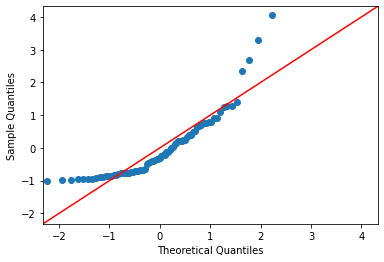

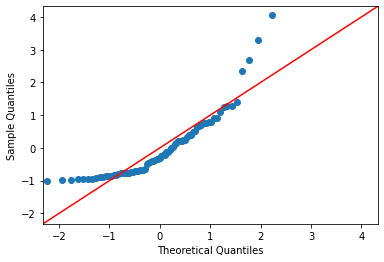

In [17]:
plt.close()
from sklearn import preprocessing
sm.qqplot(preprocessing.scale(data_alanine), line='45')

In [18]:
w, p_value = stats.shapiro(data_alanine)
p_value

4.927390762077266e-08

**Ex. 6) Verifica se a concentração de Alanina entre as duas categorias é semelhante, visualmente (usando histogramas) e usando testes estatísticos apropriados.**

- Vimos que a variável não tem uma distruição normal -> usar teste não paramétrico
- Mas depois da transformação logarítmica já tem uma distribuição normal -> teste paramétrico
- Podemos usar as duas opções. Mas o correto é testar primeiro para cada um dos grupos se estes têm uma distribuição norma. 

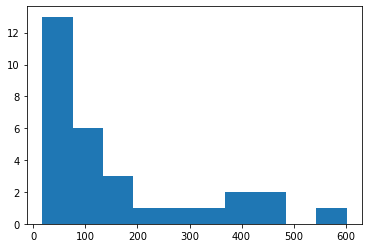

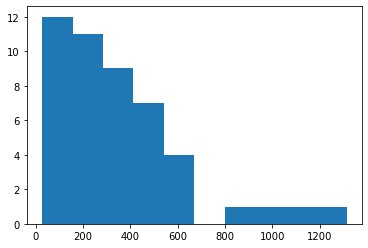

In [19]:
data_alanine = data.Alanine
control = data_alanine[meta["Muscle.loss"]=="control"]
cachexic = data_alanine[meta["Muscle.loss"]=="cachexic"]

plt.hist(control)
plt.show()
plt.hist(cachexic)
plt.show()

Quais os metabolitos que têm concentrações significativamente diferentes entre os dois grupos: control e cachexic. 

In [20]:
type(data[meta['Muscle.loss']=='control'])

pandas.core.frame.DataFrame

In [21]:
#assumindo que fazemos o t-test

metabs_de_tt = lambda x : stats.ttest_ind(x[meta['Muscle.loss']=='control'],x[meta['Muscle.loss']=='cachexic'])

data.columns[data.apply(lambda x: metabs_de_tt(x)[1]<0.05)]

Index(['2-Aminobutyrate', '2-Hydroxyisobutyrate', '3-Hydroxybutyrate',
       '3-Hydroxyisovalerate', '3-Indoxylsulfate', 'Acetate', 'Adipate',
       'Alanine', 'Asparagine', 'Betaine', 'Citrate', 'Creatinine',
       'Dimethylamine', 'Ethanolamine', 'Formate', 'Fucose', 'Glucose',
       'Glutamine', 'Glycine', 'Hippurate', 'Histidine', 'Leucine',
       'Methylamine', 'N.N-Dimethylglycine', 'Pyroglutamate', 'Pyruvate',
       'Quinolinate', 'Serine', 'Succinate', 'Taurine', 'Threonine',
       'Trigonelline', 'Trimethylamine N-oxide', 'Tryptophan', 'Tyrosine',
       'Valine', 'cis-Aconitate', 'myo-Inositol', 'trans-Aconitate',
       'tau-Methylhistidine'],
      dtype='object')

**Ex.7) Repita o anterior usando Testes não paramétricos - Mann-Whitney U test**

In [22]:
stats.mannwhitneyu(control, cachexic)

MannwhitneyuResult(statistic=351.5, pvalue=0.0002263657422396913)

In [23]:
metabs_de_mw = lambda x : stats.mannwhitneyu(x[meta['Muscle.loss']=='control'],x[meta['Muscle.loss']=='cachexic'])

data.columns[data.apply(lambda x: metabs_de_mw(x)[1]<0.05)]

Index(['1.6-Anhydro-beta-D-glucose', '1-Methylnicotinamide', '2-Aminobutyrate',
       '2-Hydroxyisobutyrate', '2-Oxoglutarate', '3-Hydroxybutyrate',
       '3-Hydroxyisovalerate', '3-Indoxylsulfate', '4-Hydroxyphenylacetate',
       'Acetate', 'Adipate', 'Alanine', 'Asparagine', 'Betaine', 'Carnitine',
       'Citrate', 'Creatine', 'Creatinine', 'Dimethylamine', 'Ethanolamine',
       'Formate', 'Fucose', 'Fumarate', 'Glucose', 'Glutamine', 'Glycine',
       'Glycolate', 'Guanidoacetate', 'Hippurate', 'Histidine', 'Lactate',
       'Leucine', 'Lysine', 'Methylamine', 'N.N-Dimethylglycine',
       'O-Acetylcarnitine', 'Pyroglutamate', 'Pyruvate', 'Quinolinate',
       'Serine', 'Succinate', 'Sucrose', 'Taurine', 'Threonine',
       'Trigonelline', 'Trimethylamine N-oxide', 'Tryptophan', 'Tyrosine',
       'Valine', 'Xylose', 'cis-Aconitate', 'myo-Inositol', 'trans-Aconitate',
       'pi-Methylhistidine', 'tau-Methylhistidine'],
      dtype='object')

Correções para testes múltiplos

In [ ]:
pvalues_tt = data.apply(lambda x: metabs_de_tt(x)[1])
pvalues_tt
type(pvalues_tt)

In [ ]:
import statsmodels.stats as sm
corr_pvalues = sm.multitest.multipletests(pvalues_tt, method = "fdr_bh")[1]
corr_pvalues

### Correlações

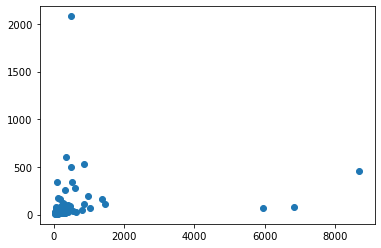

In [24]:
data_glucose = data.Glucose
data_sucrose = data.Sucrose

plt.scatter(data_glucose, data_sucrose)
plt.show()

In [25]:
corr, _ = stats.pearsonr(data_glucose, data_sucrose)
corr

0.13547549419553698

In [26]:
sp_corr, _ = stats.spearmanr(data_glucose, data_sucrose)
sp_corr

0.6074430955626448

In [27]:
corr_matrix = data.corr()
corr_matrix

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
1.6-Anhydro-beta-D-glucose,1.000000,0.058737,0.261133,0.502000,-0.011638,0.066444,0.213141,0.315203,0.284076,0.362212,...,0.477076,0.405719,0.076550,0.274734,0.239883,0.228877,0.034422,0.227732,0.283274,0.305215
1-Methylnicotinamide,0.058737,1.000000,0.001473,0.319200,0.070344,0.020080,0.143886,0.353414,0.350952,0.193748,...,0.193252,0.213351,0.153604,0.265853,0.073942,0.174632,0.217717,0.363028,0.101935,0.209146
2-Aminobutyrate,0.261133,0.001473,1.000000,0.386207,0.267917,0.312870,0.602727,0.111230,0.318236,0.288714,...,0.442360,0.455340,0.051508,0.394220,0.044776,0.623086,0.333103,0.232460,0.165093,0.356491
2-Hydroxyisobutyrate,0.502000,0.319200,0.386207,1.000000,0.390898,0.137614,0.523609,0.423808,0.387808,0.442970,...,0.616427,0.460935,0.365786,0.616313,0.283124,0.492954,0.521393,0.532692,0.242757,0.542963
2-Oxoglutarate,-0.011638,0.070344,0.267917,0.390898,1.000000,0.107302,0.463864,0.081948,0.088126,0.269571,...,0.326844,0.196630,0.464388,0.276786,0.001352,0.620086,0.226030,0.045211,0.121393,0.423475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cis-Aconitate,0.228877,0.174632,0.623086,0.492954,0.620086,0.280719,0.788881,0.493663,0.442458,0.375749,...,0.534450,0.693191,0.489057,0.620082,0.131992,1.000000,0.234888,0.347724,0.246590,0.555248
myo-Inositol,0.034422,0.217717,0.333103,0.521393,0.226030,0.050170,0.327568,0.247363,0.187753,0.308272,...,0.303620,0.275511,0.196810,0.520342,0.035814,0.234888,1.000000,0.298212,0.087485,0.167867
trans-Aconitate,0.227732,0.363028,0.232460,0.532692,0.045211,0.157105,0.443377,0.562218,0.453476,0.519558,...,0.393377,0.469261,0.299285,0.586871,0.152449,0.347724,0.298212,1.000000,0.043348,0.284674
pi-Methylhistidine,0.283274,0.101935,0.165093,0.242757,0.121393,0.035706,0.122016,0.318782,0.110577,0.157999,...,0.274903,0.308888,0.323873,0.320151,-0.042070,0.246590,0.087485,0.043348,1.000000,0.560223


In [28]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [29]:
corr_matrix_sp = data.corr(method = "spearman")
corr_matrix_sp

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
1.6-Anhydro-beta-D-glucose,1.000000,0.213791,0.393353,0.431107,0.190138,0.362646,0.413739,0.476159,0.456510,0.541459,...,0.535440,0.537393,0.183508,0.485542,0.443694,0.491823,0.268319,0.567942,0.333336,0.339278
1-Methylnicotinamide,0.213791,1.000000,0.393188,0.636827,0.502639,0.271462,0.603773,0.560133,0.452754,0.499284,...,0.539492,0.452002,0.655150,0.642429,0.573562,0.688882,0.548590,0.459577,0.493338,0.524524
2-Aminobutyrate,0.393353,0.393188,1.000000,0.498981,0.479472,0.581374,0.629076,0.482654,0.511512,0.460158,...,0.559952,0.618317,0.378080,0.567748,0.401733,0.578391,0.407998,0.520544,0.447989,0.591802
2-Hydroxyisobutyrate,0.431107,0.636827,0.498981,1.000000,0.596095,0.439205,0.711460,0.605999,0.554724,0.672081,...,0.774912,0.723448,0.628799,0.805676,0.714340,0.763064,0.740098,0.692825,0.526674,0.638895
2-Oxoglutarate,0.190138,0.502639,0.479472,0.596095,1.000000,0.437903,0.580499,0.293015,0.404922,0.479153,...,0.563615,0.522086,0.652269,0.596582,0.411852,0.625973,0.563596,0.425654,0.557482,0.599155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cis-Aconitate,0.491823,0.688882,0.578391,0.763064,0.625973,0.522051,0.750574,0.665107,0.624316,0.685012,...,0.760204,0.716129,0.673580,0.861338,0.677572,1.000000,0.613480,0.643595,0.686625,0.754080
myo-Inositol,0.268319,0.548590,0.407998,0.740098,0.563596,0.435302,0.700047,0.517511,0.525290,0.645951,...,0.677629,0.659590,0.508289,0.752611,0.629287,0.613480,1.000000,0.622045,0.479164,0.538338
trans-Aconitate,0.567942,0.459577,0.520544,0.692825,0.425654,0.498100,0.716560,0.627119,0.623671,0.746480,...,0.652186,0.692916,0.406347,0.702386,0.653301,0.643595,0.622045,1.000000,0.398379,0.510287
pi-Methylhistidine,0.333336,0.493338,0.447989,0.526674,0.557482,0.477799,0.542471,0.472058,0.389262,0.455820,...,0.585607,0.569284,0.550082,0.605840,0.410909,0.686625,0.479164,0.398379,1.000000,0.745966


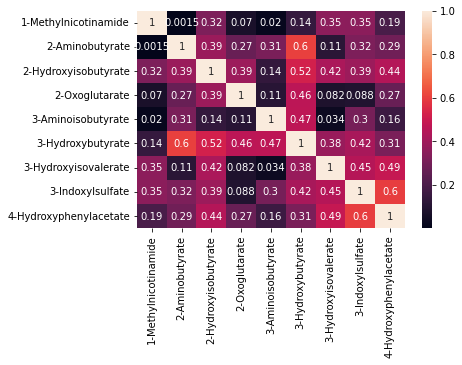

In [30]:
import seaborn as sn
sn.heatmap(corr_matrix.iloc[1:10,1:10], annot=True)
plt.show()

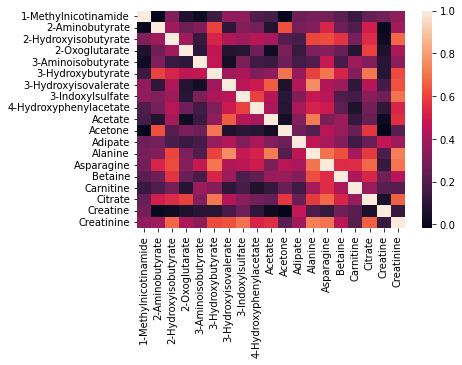

In [31]:
sn.heatmap(corr_matrix.iloc[1:20,1:20], annot=False)
plt.show()

Análise de variância / regressão linear

In [32]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols("data.Leucine~data.Valine", data).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
data.Valine,1.0,27270.744263,27270.744263,258.526482,5.176821e-26
Residual,75.0,7911.397719,105.485303,NaN,NaN


In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           data.Leucine   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           5.18e-26
Time:                        18:22:22   Log-Likelihood:                -287.60
No. Observations:                  77   AIC:                             579.2
Df Residuals:                      75   BIC:                             583.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6132      1.836      0.878      0.382      -2.045       5.271
data.Valine     0.6379      0.040     16.079      0.000       0.559       0.717
==============================================================================
Omnibus:                       43.791   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.747
Skew:                           1.550   Prob(JB):                     3.51e-50
Kurtosis:                      10.834   Cond. No.                         72.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm.rsquared

0.7751302998380194

**Ex.8) Repita o anterior adicionando a Glucose como variável dependente**

In [35]:
lm2 = ols("data.Leucine~data.Valine+ data.Glucose", data).fit()

In [36]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           data.Leucine   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           8.29e-25
Time:                        18:23:34   Log-Likelihood:                -287.35
No. Observations:                  77   AIC:                             580.7
Df Residuals:                      74   BIC:                             587.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8647      1.879      0.993      0.324      -1.878       5.608
data.Valine      0.6198      0.048     12.995      0.000       0.525       0.715
data.Glucose     0.0007      0.001      0.689      0.493      -0.001       0.003
==============================================================================
Omnibus:                       47.059   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.660
Skew:                           1.703   Prob(JB):                     2.74e-54
Kurtosis:                      11.079   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
data["MuscleLoss"] = meta["Muscle.loss"]

In [38]:
lm3 = ols("data.Leucine~data.MuscleLoss", data).fit()

In [39]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           data.Leucine   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     14.62
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           0.000270
Time:                        18:23:36   Log-Likelihood:                -338.19
No. Observations:                  77   AIC:                             680.4
Df Residuals:                      75   BIC:                             685.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     31.2617      2.890     10.817      0.000      25.504      37.019
data.MuscleLoss[T.control]   -17.7050      4.630     -3.824      0.000     -26.929      -8.481
==============================================================================
Omnibus:                       40.574   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.271
Skew:                           1.826   Prob(JB):                     2.78e-22
Kurtosis:                       7.195   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""